In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [142]:
data = {
    'Name': ['John', 'Alice', 'Robert', 'Mary', 'David', 'Emma', 'James', 'Olivia', 'Daniel', 'Sophia',
             'Chris', 'Ava', 'Mike', 'Isabella', 'Tom', 'Mia', 'Jack', 'Lily', 'Ryan', 'Emily'],
    'Gender': ['Male', 'Female'] * 10,
    'Job Role': ['Engineer', 'Engineer', 'Analyst', 'Analyst', 'Manager', 'Manager', 'HR', 'HR', 'Tech Lead', 'Tech Lead',
                 'Data Scientist', 'Data Scientist', 'Support', 'Support', 'Consultant', 'Consultant', 'QA', 'QA', 'Admin', 'Admin'],
    'Experience (Years)': [3, 3, 2, 2, 8, 8, 4, 4, 10, 10, 5, 5, 1, 1, 6, 6, 2, 2, 1, 1],
    'Education Level': ['Bachelor'] * 20,
    'Salary': [70000, 65000, 50000, 47000, 120000, 110000, 60000, 58000, 130000, 125000,
               95000, 90000, 40000, 39000, 100000, 96000, 52000, 50000, 41000, 39000]
}

df = pd.DataFrame(data)
df


,Name,Gender,Job Role,Experience (Years),Education Level,Salary
0,John,Male,Engineer,3,Bachelor,70000
1,Alice,Female,Engineer,3,Bachelor,65000
2,Robert,Male,Analyst,2,Bachelor,50000
3,Mary,Female,Analyst,2,Bachelor,47000
4,David,Male,Manager,8,Bachelor,120000
5,Emma,Female,Manager,8,Bachelor,110000
6,James,Male,HR,4,Bachelor,60000
7,Olivia,Female,HR,4,Bachelor,58000
8,Daniel,Male,Tech Lead,10,Bachelor,130000
9,Sophia,Female,Tech Lead,10,Bachelor,125000


In [144]:
#basic statistics
df.describe()

,Experience (Years),Salary
count,20.000000,20.000000
mean,4.200000,73850.000000
std,2.966479,31300.369932
min,1.000000,39000.000000
25%,2.000000,49250.000000
50%,3.500000,62500.000000
75%,6.000000,97000.000000
max,10.000000,130000.000000


In [145]:
#gender count 
print("\n Gender Distribution")
print(df["Gender"].value_counts())


 Gender Distribution
Gender
Male      10
Female    10
Name: count, dtype: int64


In [146]:
#average salary by gender 

In [147]:
avg_salary =df.groupby("Gender")["Salary"].mean()
print("\n Average Salary by Gender")
print(avg_salary)


 Average Salary by Gender
Gender
Female    71900.0
Male      75800.0
Name: Salary, dtype: float64


In [149]:
#visualize salary distribution

In [150]:
#boxplt

C:\Users\DELL 4\AppData\Local\Temp\ipykernel_4648\107366780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='pastel')


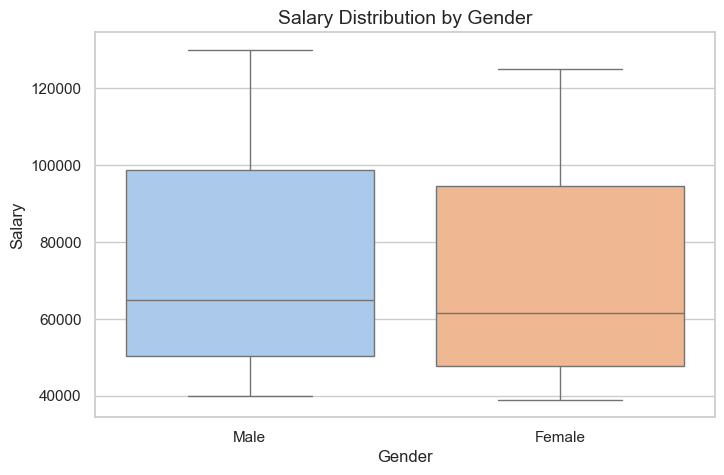

In [151]:
# Set visual style
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Salary', data=df, palette='pastel')
plt.title('Salary Distribution by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

In [152]:
#Conclusion Template

In [153]:
if avg_salary['Male'] > avg_salary['Female']:
    print("⚠️ There appears to be a gender pay gap favoring males.")
elif avg_salary['Male'] < avg_salary['Female']:
    print("⚠️ There appears to be a gender pay gap favoring females.")
else:
    print("✅ No gender-based salary gap found in this dataset.")

⚠️ There appears to be a gender pay gap favoring males.


In [154]:
#df.to_csv("sample_employee_salary_data.csv", index=False)


In [155]:
# confirm the bias is unfair 

Before fixing, make sure it’s not due to valid reasons (like experience, performance, etc.)

In [167]:
#check if experience differs
df.groupby('Gender')['Experience (Years)'].mean()

Gender
Female    4.2
Male      4.2
Name: Experience (Years), dtype: float64

In [169]:
#remove Gender Influence in model training

If you're training an ML model (e.g., to predict salary, recommend candidates, etc.):

In [172]:
x= df.drop(["Salary","Gender"],axis=1)
y=df['Salary']

This prevents the model from learning gender-based patterns.

In [175]:
#normalize the salary data

In [177]:
#equalize salaries for same job and experience 
df["Expected Salary"]=df.groupby(['Job Role','Experience (Years)'])['Salary'].transform('mean')

In [179]:
#Fix bias : set salary = expected salary

df['Corrected Salary']=df['Expected Salary']

In [181]:
df['Bias Gap'] = df['Expected Salary'] - df['Salary']


In [183]:
df['Bias Gap']

0    -2500.0
1     2500.0
2    -1500.0
3     1500.0
4    -5000.0
5     5000.0
6    -1000.0
7     1000.0
8    -2500.0
9     2500.0
10   -2500.0
11    2500.0
12    -500.0
13     500.0
14   -2000.0
15    2000.0
16   -1000.0
17    1000.0
18   -1000.0
19    1000.0
Name: Bias Gap, dtype: float64

In [185]:
df['Corrected Salary']

0      67500.0
1      67500.0
2      48500.0
3      48500.0
4     115000.0
5     115000.0
6      59000.0
7      59000.0
8     127500.0
9     127500.0
10     92500.0
11     92500.0
12     39500.0
13     39500.0
14     98000.0
15     98000.0
16     51000.0
17     51000.0
18     40000.0
19     40000.0
Name: Corrected Salary, dtype: float64

In [187]:
df['Expected Salary']

0      67500.0
1      67500.0
2      48500.0
3      48500.0
4     115000.0
5     115000.0
6      59000.0
7      59000.0
8     127500.0
9     127500.0
10     92500.0
11     92500.0
12     39500.0
13     39500.0
14     98000.0
15     98000.0
16     51000.0
17     51000.0
18     40000.0
19     40000.0
Name: Expected Salary, dtype: float64

In [189]:
#create a fair salary suggestion system 

Train a model only on valid features:

In [192]:
valid_features = ['Experience (Years)', 'Job Role', 'Education Level']
X = df[valid_features]
y = df['Salary']

In [196]:
df

,Name,Gender,Job Role,Experience (Years),Education Level,Salary,Expected Salary,Corrected Salary,Bias Gap
0,John,Male,Engineer,3,Bachelor,70000,67500.0,67500.0,-2500.0
1,Alice,Female,Engineer,3,Bachelor,65000,67500.0,67500.0,2500.0
2,Robert,Male,Analyst,2,Bachelor,50000,48500.0,48500.0,-1500.0
3,Mary,Female,Analyst,2,Bachelor,47000,48500.0,48500.0,1500.0
4,David,Male,Manager,8,Bachelor,120000,115000.0,115000.0,-5000.0
5,Emma,Female,Manager,8,Bachelor,110000,115000.0,115000.0,5000.0
6,James,Male,HR,4,Bachelor,60000,59000.0,59000.0,-1000.0
7,Olivia,Female,HR,4,Bachelor,58000,59000.0,59000.0,1000.0
8,Daniel,Male,Tech Lead,10,Bachelor,130000,127500.0,127500.0,-2500.0
9,Sophia,Female,Tech Lead,10,Bachelor,125000,127500.0,127500.0,2500.0


In [202]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load your dataset
valid_features = ['Experience (Years)', 'Job Role', 'Education Level']
X = df[valid_features]
y = df['Salary']

# Categorical and numerical columns
categorical_features = ['Job Role', 'Education Level']

# Define column transformer with safe encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 30804928.483979836


C:\Users\DELL 4\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [204]:
# Sample prediction (now works safely)
sample = pd.DataFrame({
    'Experience (Years)': [5],
    'Job Role': ['Engineer'],
    'Education Level': ['Bachelor']
})
predicted_salary = pipeline.predict(sample)
print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 81530.05464480874


C:\Users\DELL 4\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


C:\Users\DELL 4\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


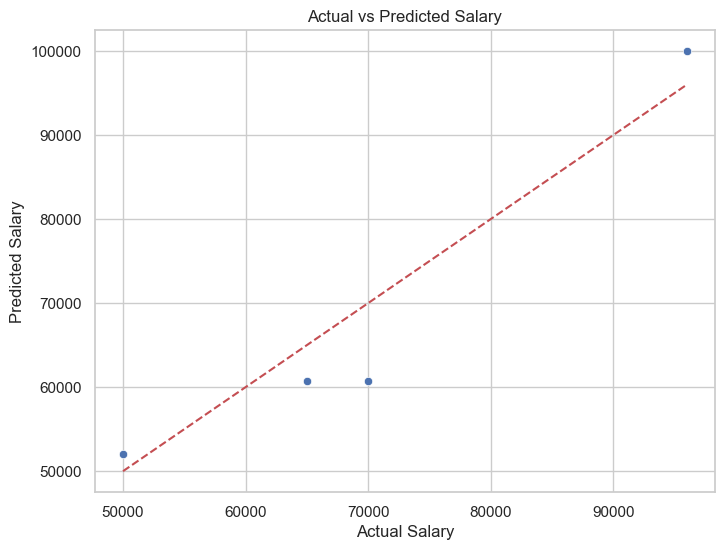

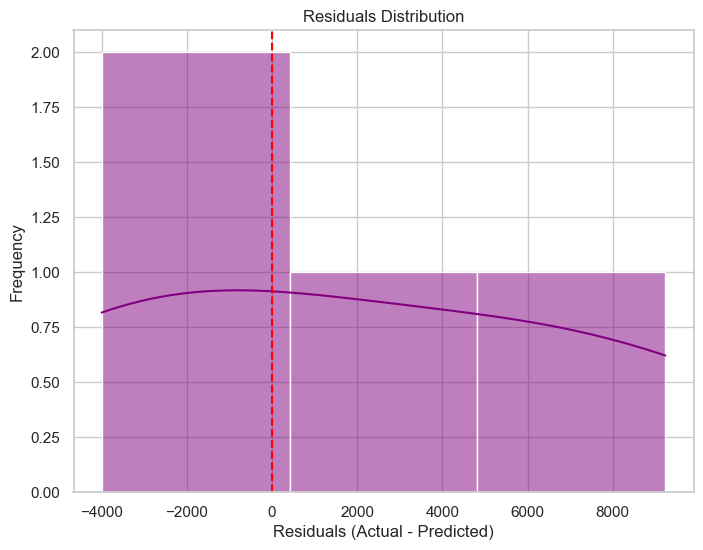

C:\Users\DELL 4\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


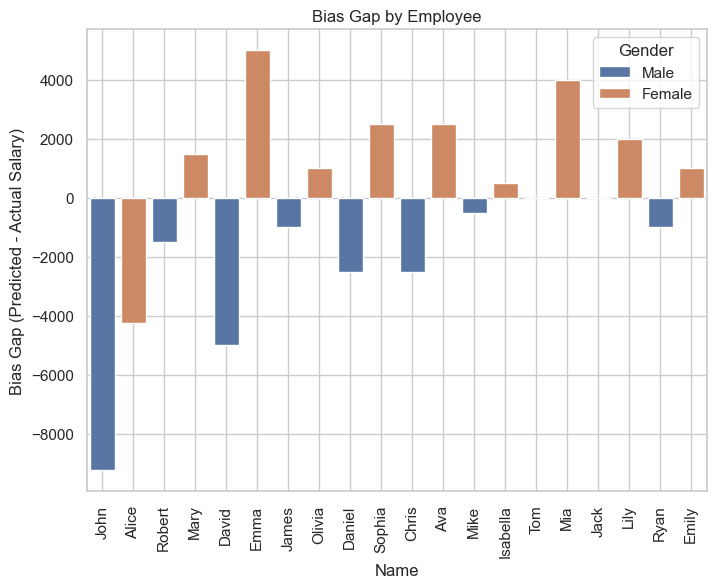

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = pipeline.predict(X_test)

# 1. Actual vs Predicted Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Reference line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Bias Gap (Optional - full data)
df['Predicted Salary'] = pipeline.predict(X)
df['Bias Gap'] = df['Predicted Salary'] - df['Salary']

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Name', y='Bias Gap', hue='Gender')
plt.xticks(rotation=90)
plt.title('Bias Gap by Employee')
plt.ylabel('Bias Gap (Predicted - Actual Salary)')
plt.grid(True)
plt.show()


Interpretation:

- Scatter plot: The closer the dots are to the red diagonal line, the better your model's predictions are.

- Residuals plot: Ideally should be centered around 0. If it's skewed, the model has a bias.

- Bias Gap bar plot: Highlights gender bias if one group consistently has larger gaps than another.